In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('spam.csv', encoding= "ISO-8859-1")

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# drop last 3 columns
df.drop(columns= ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [7]:
df.sample(5)

,v1,v2
3896,ham,No. Thank you. You've been wonderful
4040,spam,Please call our customer service representativ...
2444,ham,"Yes but i dont care! I need you bad, princess!"
2495,spam,WINNER! As a valued network customer you hvae ...
5508,ham,"Machan you go to gym tomorrow, i wil come lat..."


In [8]:
# renaming the column
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace = True)
df.sample(5)

,target,text
5398,ham,Hi. Hope you had a good day. Have a better night.
1984,spam,Urgent! Please call 09061743810 from landline....
5292,spam,Urgent! Please call 09061213237 from landline....
4992,ham,\HEY KATE
4081,ham,No no. I will check all rooms befor activities


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])


In [11]:
df.head(3)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


In [12]:
# missing values
df.isnull().sum()
# ham = 0, spam =1

target    0
text      0
dtype: int64

In [13]:
# check duplicate values
df.duplicated().sum()

403

In [14]:
# remove duplicates
df = df.drop_duplicates(keep= 'first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

## EDA

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [19]:
import matplotlib.pyplot as plt

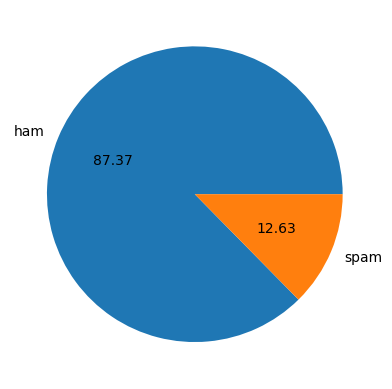

In [20]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct= "%0.2f")
plt.show()

# Data is imbalanced

In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df['character_count'] = df['text'].apply(len)

In [24]:
df.head()

,target,text,character_count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
# num of words
df['words_count'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [26]:
df.head()

,target,text,character_count,words_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
# number of sentences
df['sentences_count'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,target,text,character_count,words_count,sentences_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df[['character_count','words_count','sentences_count']].describe()

,character_count,words_count,sentences_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
# ham
df[df['target'] == 0][['character_count','words_count','sentences_count']].describe()

,character_count,words_count,sentences_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# spam
df[df['target'] == 1][['character_count','words_count','sentences_count']].describe()

,character_count,words_count,sentences_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='character_count', ylabel='Count'>

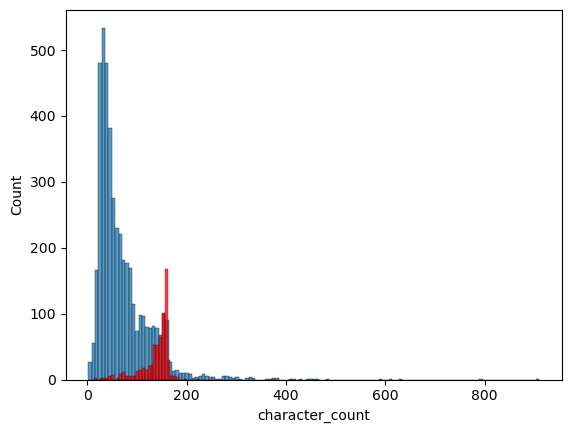

In [32]:
sns.histplot(df[df['target']==0]['character_count'])
sns.histplot(df[df['target']==1]['character_count'], color = 'red')

<Axes: xlabel='words_count', ylabel='Count'>

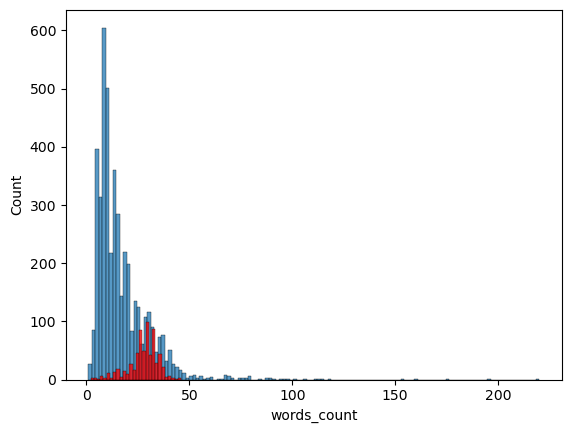

In [33]:
sns.histplot(df[df['target']==0]['words_count'])
sns.histplot(df[df['target']==1]['words_count'], color = 'red')

C:\Users\AUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


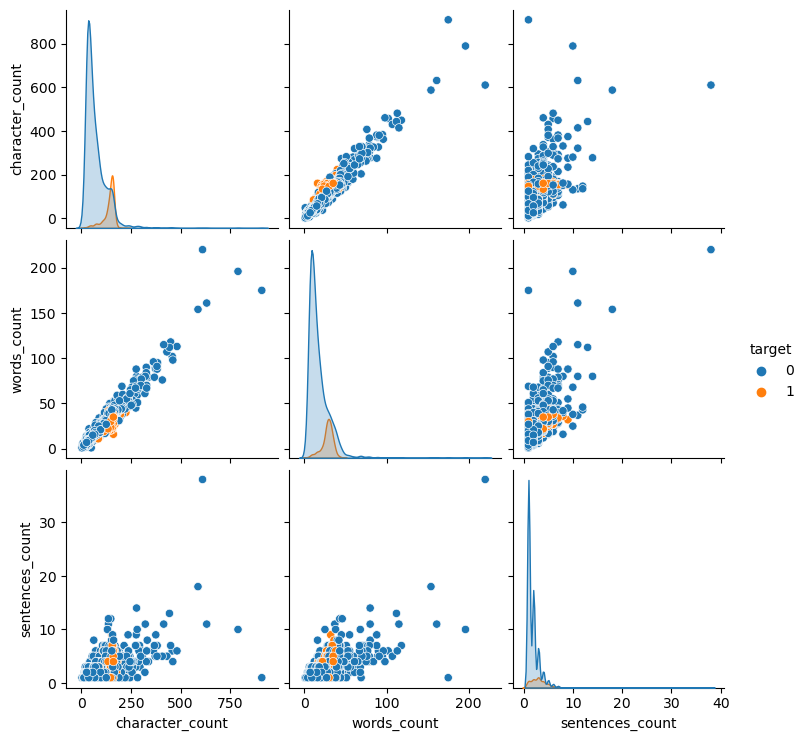

In [34]:
sns.pairplot(df,hue= 'target')

In [35]:
# sns.heatmap

## Data Preprocessing
1. lower case
2. tokenization (wrods m break krna)
3. removing special cahracter
4. removing stop words and punctuation (stop words = is,a,the etc)
5. stemming (dance, dancing, danced == dance)

In [36]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [47]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [48]:
ps.stem('loving')

'love'

In [49]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if(i.isalnum()):
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if (i not in stopwords.words('english') and i not in string.punctuation):
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [50]:
transform_text("Hi HoW are YOU. I loved the youtube lectures, how about you ?")

'hi love youtub lectur'

In [51]:
df['transformed_text'] = df['text'].apply(transform_text)

In [52]:
df.head()

,target,text,character_count,words_count,sentences_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [53]:
# wordcloud
# from wordcloud import WordCloud

In [54]:
spam_corpus = []
for mssg in df[df['target']==1]['transformed_text']:
    for word in mssg.split():
        spam_corpus.append(word)

In [55]:
len(spam_corpus)

9939

In [56]:
from collections import Counter

<BarContainer object of 30 artists>

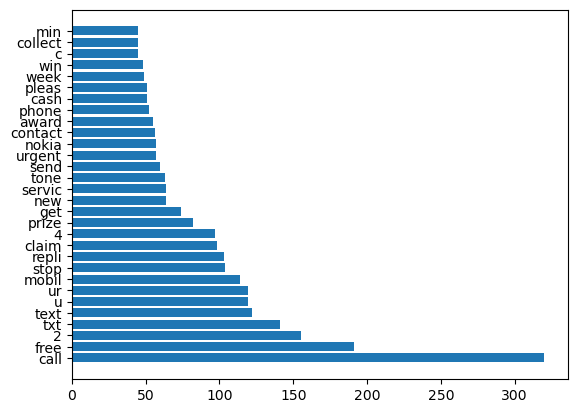

In [57]:
plt.barh(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

In [58]:
ham_corpus = []
for mssg in df[df['target']==0]['transformed_text']:
    for word in mssg.split():
        ham_corpus.append(word)

<BarContainer object of 30 artists>

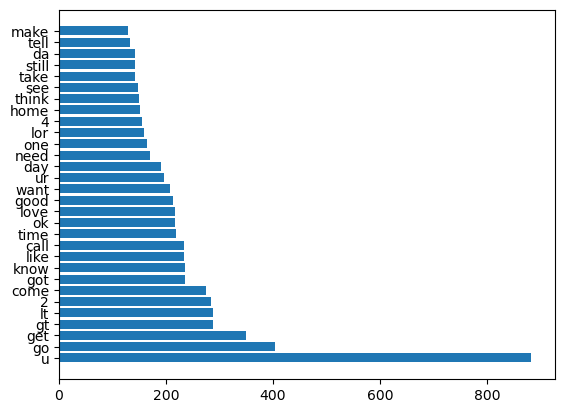

In [59]:
plt.barh(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])

## Model Building

### 1. Naive Bayes
good for textual data

In [60]:
# vectorizing transformed data

In [61]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [62]:
#x = cv.fit_transform(df['transformed_text']).toarray()
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [63]:
print(x.shape)

(5169, 6708)


In [64]:
y = df['target'].values

In [65]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 21)

In [68]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

In [69]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [70]:
gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)
print("GNB accuracy score :",accuracy_score(y_test,y_pred_gnb))
print(confusion_matrix(y_test,y_pred_gnb))
print("GNB precision score :",precision_score(y_test,y_pred_gnb))

GNB accuracy score : 0.8520309477756286
[[778 130]
 [ 23 103]]
GNB precision score : 0.44206008583690987


In [71]:
mnb.fit(X_train,y_train)
y_pred_mnb = mnb.predict(X_test)
print("MNB accuracy score :",accuracy_score(y_test,y_pred_mnb))
print(confusion_matrix(y_test,y_pred_mnb))
print("MNB precision score :",precision_score(y_test,y_pred_mnb))

MNB accuracy score : 0.9506769825918762
[[908   0]
 [ 51  75]]
MNB precision score : 1.0


In [72]:
bnb.fit(X_train,y_train)
y_pred_bnb = bnb.predict(X_test)
print("BNB accuracy score :",accuracy_score(y_test,y_pred_bnb))
print(confusion_matrix(y_test,y_pred_bnb))
print("BNB precision score :",precision_score(y_test,y_pred_bnb))

BNB accuracy score : 0.9642166344294004
[[906   2]
 [ 35  91]]
BNB precision score : 0.978494623655914


In [73]:
# tfidf --> MNB gives more accuracy 

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB

In [84]:
lrc = LogisticRegression()
svc = SVC(kernel='sigmoid', gamma = 1.0)
dtc = DecisionTreeClassifier(max_depth= 5)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators= 60, random_state= 7)
abc = AdaBoostClassifier(n_estimators= 55, random_state= 9)
bc = BaggingClassifier(n_estimators=60, random_state= 5)
etc = ExtraTreesClassifier(n_estimators=60, random_state= 3)
gbc = GradientBoostingClassifier(n_estimators=60, random_state=2)
xgbc = XGBClassifier(n_estimators = 60,random_state =2)
mnb = MultinomialNB()

In [85]:
clfs = {
    'LR' : lrc,
    'SVC' : svc,
    'DTC' : dtc,
    'KNC' : knc,
    'RFC' : rfc,
    'ABC' : abc,
    'BC' : bc,
    'ETC' : etc,
    'GBC' : gbc,
    'xgbc' : xgbc,
    'NB' : mnb}

In [86]:
def classifier_model(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [87]:
classifier_model(lrc,X_train,y_train,X_test,y_test)

(0.9400386847195358, 0.9705882352941176)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy, current_precision = classifier_model(clf,X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy :",current_accuracy)
    print("Precision :",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  LR
Accuracy : 0.9400386847195358
Precision : 0.9705882352941176
For  SVC
Accuracy : 0.9661508704061895
Precision : 0.941747572815534
For  DTC
Accuracy : 0.9303675048355899
Precision : 0.77
For  KNC
Accuracy : 0.9052224371373307
Precision : 1.0
For  RFC
Accuracy : 0.9690522243713733
Precision : 1.0
For  ABC
Accuracy : 0.9564796905222437
Precision : 0.900990099009901


In [80]:
performance_df = pd.DataFrame({'Algorithm' : clfs.keys(), 'Accuracy':accuracy_scores, 'Precision': precision_scores})

In [82]:
performance_df.sort_values('Precision', ascending=False)

,Algorithm,Accuracy,Precision
3,KNC,0.905222,1.000000
4,RFC,0.969052,1.000000
7,ETC,0.969052,1.000000
0,LR,0.940039,0.970588
1,SVC,0.966151,0.941748
9,xgbc,0.964217,0.932039
8,GBC,0.945841,0.906977
5,ABC,0.956480,0.900990
6,BC,0.951644,0.839286
2,DTC,0.930368,0.770000
